In [193]:
def numerical_diff(f, x):
    h = 10e-50
    return (f * (x + h) - f * (x)) / h

In [194]:
numerical_diff(2, 1)

0.0

In [206]:
# 이렇게 하면 컴퓨터는 반올림을 어느 시점에서 하는데 그러면 그냥 값이 0임
# 그러면 위 값 계산해도 0이 나옴
# 그러면 10 ** -4 정도를 하면 결과값이 잘 나온다는데 그렇게 되면 오차범위가 커짐
#그래서 그 오차 범위를 줄여주기 위해서 아래와 같이 식을 적음

In [207]:
def numerical_diff(f, x): # 이렇게 하면 오차값이 있어서 줄여주기 위해 아래처럼 씀
    h = 1e-5
    return (f * (x + h) - f * (x)) / h
numerical_diff(2, 1)

2.0000000000131024

In [229]:
def numerical_diff(f, x):
    h = 1e-5
    return ((f * (x + h)) - (f * (x - h))) / (2 * h)

In [230]:
numerical_diff(2, 1)

2.000000000002

In [196]:
## y = 0.01x**2 + 0.1x를 수치미분해보자

1.9999999999997797

In [208]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

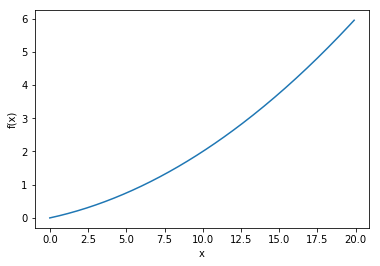

In [210]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
x = np.arange(0, 20, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [251]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    print(f(x+h), f(x-h))
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 

numerical_diff(function_1, 5), numerical_diff(function_1, 10)

0.7500200000999999 0.7499800001000001
2.0000300000999998 1.9999700001


(0.1999999999990898, 0.2999999999986347)

In [255]:
(function_1(5.0001) - function_1(4.9999)) / 0.0002

0.1999999999990898

In [269]:
## 편미분
def function_2(x):
    return np.sum(x ** 2)

In [258]:
# x0 = 3 x1 = 4일 때 x0에 대한 편미분을 구하라
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0

numerical_diff(function_tmp1, 3.0)

25.00060001 24.99940001


6.00000000000378

In [266]:
# x0 = 3 x1 = 4일 때 x0에 대한 편미분을 구하라
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

numerical_diff(function_tmp2, 4.0)

25.00080001 24.99920001


7.999999999999119

In [281]:
def numerical_gradient(f, x):
    h  = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h # h(x + h)
        fxh1 = f(x)
        
        x[idx] = tmp_val - h # h(x-h)
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val 
    return grad

In [282]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [300]:
def gradient_descent(f, x, lr = 0.01, step_num = 100):
    # f = 최적화하려는 함수
    # lr = learning rate
    # step_num 반복 횟수
    hist = []
    
    
    for i in range(step_num):
        hist.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, hist

In [292]:
def function_3(x):
    return x[0] ** 2 + x[1] ** 2

In [301]:
x = np.array([-3.0, 4.0])
gradient_descent(function_3, x, 0.1, 100)

(array([-6.11110793e-10,  8.14814391e-10]),
 [array([-3.,  4.]),
  array([-2.4,  3.2]),
  array([-1.92,  2.56]),
  array([-1.536,  2.048]),
  array([-1.2288,  1.6384]),
  array([-0.98304,  1.31072]),
  array([-0.786432,  1.048576]),
  array([-0.6291456,  0.8388608]),
  array([-0.50331648,  0.67108864]),
  array([-0.40265318,  0.53687091]),
  array([-0.32212255,  0.42949673]),
  array([-0.25769804,  0.34359738]),
  array([-0.20615843,  0.27487791]),
  array([-0.16492674,  0.21990233]),
  array([-0.1319414 ,  0.17592186]),
  array([-0.10555312,  0.14073749]),
  array([-0.08444249,  0.11258999]),
  array([-0.06755399,  0.09007199]),
  array([-0.0540432 ,  0.07205759]),
  array([-0.04323456,  0.05764608]),
  array([-0.03458765,  0.04611686]),
  array([-0.02767012,  0.03689349]),
  array([-0.02213609,  0.02951479]),
  array([-0.01770887,  0.02361183]),
  array([-0.0141671 ,  0.01888947]),
  array([-0.01133368,  0.01511157]),
  array([-0.00906694,  0.01208926]),
  array([-0.00725355,  0.0096

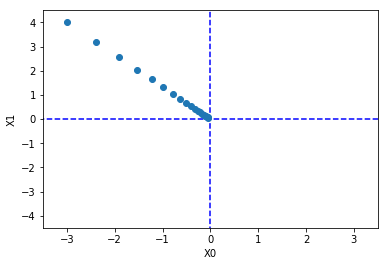

In [297]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

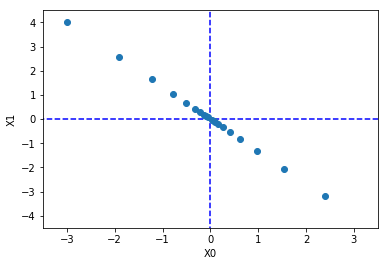

In [314]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.9
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [315]:
x_history

array([[-3.        ,  4.        ],
       [ 2.4       , -3.2       ],
       [-1.92      ,  2.56      ],
       [ 1.536     , -2.048     ],
       [-1.2288    ,  1.6384    ],
       [ 0.98304   , -1.31072   ],
       [-0.786432  ,  1.048576  ],
       [ 0.6291456 , -0.8388608 ],
       [-0.50331648,  0.67108864],
       [ 0.40265318, -0.53687091],
       [-0.32212255,  0.42949673],
       [ 0.25769804, -0.34359738],
       [-0.20615843,  0.27487791],
       [ 0.16492674, -0.21990233],
       [-0.1319414 ,  0.17592186],
       [ 0.10555312, -0.14073749],
       [-0.08444249,  0.11258999],
       [ 0.06755399, -0.09007199],
       [-0.0540432 ,  0.07205759],
       [ 0.04323456, -0.05764608]])

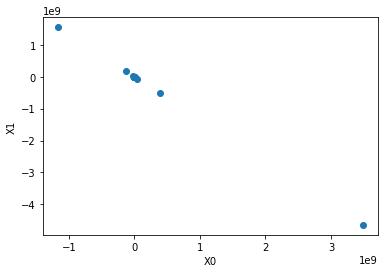

array([[-3.00000000e+00,  4.00000000e+00],
       [ 9.00000000e+00, -1.20000000e+01],
       [-2.70000000e+01,  3.60000000e+01],
       [ 8.10000000e+01, -1.08000000e+02],
       [-2.43000000e+02,  3.24000000e+02],
       [ 7.29000000e+02, -9.72000000e+02],
       [-2.18700000e+03,  2.91600000e+03],
       [ 6.56100000e+03, -8.74800004e+03],
       [-1.96830002e+04,  2.62439998e+04],
       [ 5.90489992e+04, -7.87320010e+04],
       [-1.77147004e+05,  2.36196016e+05],
       [ 5.31441100e+05, -7.08588072e+05],
       [-1.59432184e+06,  2.12576251e+06],
       [ 4.78297308e+06, -6.37726483e+06],
       [-1.43489019e+07,  1.91316414e+07],
       [ 4.30460981e+07, -5.73971086e+07],
       [-1.29143902e+08,  1.72202891e+08],
       [ 3.87416098e+08, -5.16517109e+08],
       [-1.16266390e+09,  1.55068289e+09],
       [ 3.48117610e+09, -4.64451711e+09]])

In [329]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    grades = []
    for i in range(step_num):
        x_history.append( x.copy() )
        
        grad = numerical_gradient(f, x)
        grades.append(grad)
        x -= lr * grad

    return x, np.array(x_history), grades


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 2
step_num = 20
x, x_history, z = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

x_history

In [330]:
z

[array([-6.,  8.]),
 array([ 18., -24.]),
 array([-54.,  72.]),
 array([ 162.00000002, -216.00000002]),
 array([-486.00000009,  647.99999993]),
 array([ 1457.9999994, -1943.9999992]),
 array([-4374.0000017 ,  5832.00002089]),
 array([ 13122.00009823, -17495.99993229]),
 array([-39365.99969864,  52488.00039291]),
 array([ 118098.0014801, -157464.0083313]),
 array([-354294.05212402,  472392.04406738]),
 array([ 1062881.46972656, -1417175.29296875]),
 array([-3188647.4609375,  4251513.671875 ]),
 array([  9565937.5  , -12754453.125]),
 array([-28697500.,  38264375.]),
 array([ 8.6095e+07, -1.1480e+08]),
 array([-2.5828e+08,  3.4436e+08]),
 array([ 7.7504e+08, -1.0336e+09]),
 array([-2.32192e+09,  3.09760e+09]),
 array([ 6.96320e+09, -9.29792e+09])]

In [323]:
[int(i[0]) for i in x_history]

[-3,
 9,
 -27,
 81,
 -243,
 729,
 -2186,
 6561,
 -19683,
 59048,
 -177147,
 531441,
 -1594321,
 4782973,
 -14348901,
 43046098,
 -129143901,
 387416098,
 -1162663901,
 3481176098]

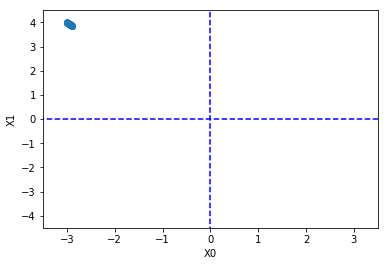

In [316]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.001
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [335]:
## 기울기 구해보기
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 들어오는 W는 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss
    
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.01620977  0.52315194 -0.5393617 ]
 [ 0.02431465  0.78472791 -0.80904256]]


In [341]:
net.W

array([[-2.47777293, -0.05137483, -0.8851103 ],
       [-2.05961574,  0.18307218, -1.65549871]])

In [344]:
net.predict(x) # np.dot(x, net.W)

array([-3.34031793,  0.13394006, -2.02101501])

In [345]:
np.dot(x, net.W)

array([-3.34031793,  0.13394006, -2.02101501])